# Priority Queue
A priority queue is a special type of queue in which each element is associated with a priority value. And, elements are served on the basis of their priority. That is, higher priority elements are served first.

However, if elements with the same priority occur, they are served according to their order in the queue.

# Assigning Priority Value

Generally, the value of the element itself is considered for assigning the priority. For example,

The element with the highest value is considered the highest priority element. However, in other cases, we can assume the element with the lowest value as the highest priority element.

We can also set priorities according to our needs.



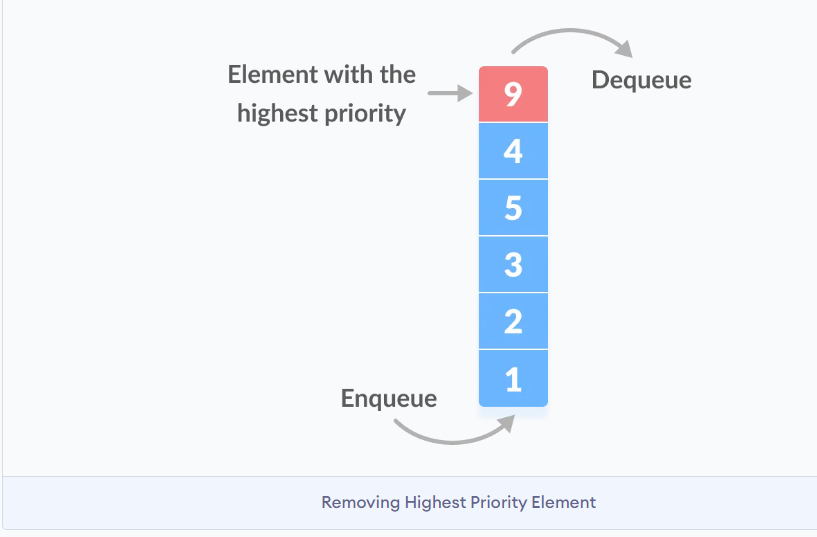

# Difference between Priority Queue and Normal Queue
In a queue, the first-in-first-out rule is implemented whereas, in a priority queue, the values are removed on the basis of priority. The element with the highest priority is removed first.



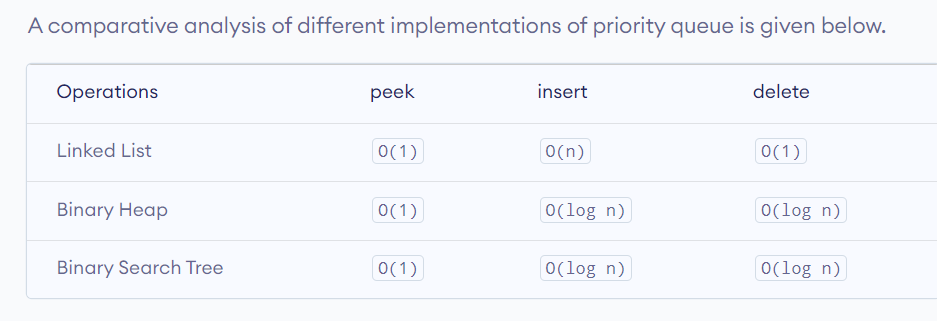

# Priority Queue Operations

# 1. Inserting an Element into the Priority Queue
Inserting an element into a priority queue (max-heap) is done by the following steps.

Insert the new element at the end of the tree.


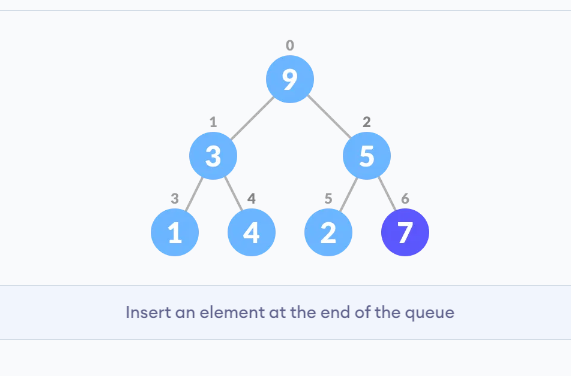

* Heapify the tree.


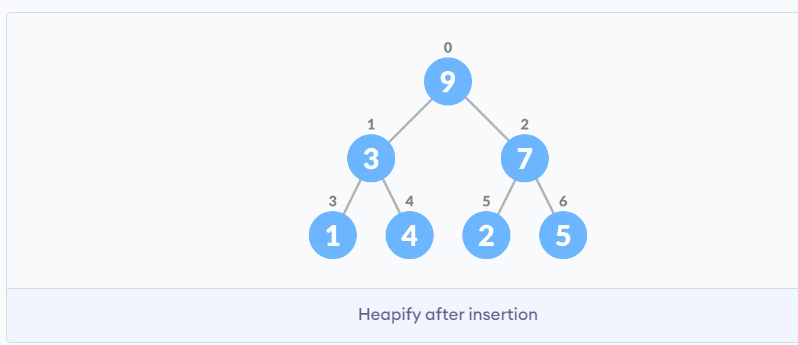

# Algorithm for insertion of an element into priority queue (max-heap)

In [1]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def insert(self, value):
        # Insert the new value at the end of the heap
        self.heap.append(value)
        # Heapify the heap from bottom to top
        self._heapify_up(len(self.heap) - 1)

    def _heapify_up(self, index):
        parent_index = (index - 1) // 2
        # While the new node is larger than its parent, swap them
        if index > 0 and self.heap[index] > self.heap[parent_index]:
            # Swap
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            # Recursively heapify up
            self._heapify_up(parent_index)

    def display(self):
        return self.heap

# Example Usage
if __name__ == "__main__":
    max_heap = MaxHeap()
    max_heap.insert(10)
    max_heap.insert(20)
    max_heap.insert(30)
    max_heap.insert(5)
    max_heap.insert(7)
    
    print("Max-Heap Array:", max_heap.display())


Max-Heap Array: [30, 10, 20, 5, 7]


# For Min Heap, the above algorithm is modified so that parentNode is always smaller than newNode.

In [2]:
class MinHeap:
    def __init__(self):
        self.heap = []

    def insert(self, value):
        # Insert the new value at the end of the heap
        self.heap.append(value)
        # Heapify the heap from bottom to top
        self._heapify_up(len(self.heap) - 1)

    def _heapify_up(self, index):
        parent_index = (index - 1) // 2
        # While the new node is smaller than its parent, swap them
        if index > 0 and self.heap[index] < self.heap[parent_index]:
            # Swap
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            # Recursively heapify up
            self._heapify_up(parent_index)

    def display(self):
        return self.heap

# Example Usage
if __name__ == "__main__":
    min_heap = MinHeap()
    min_heap.insert(10)
    min_heap.insert(20)
    min_heap.insert(30)
    min_heap.insert(5)
    min_heap.insert(7)
    
    print("Min-Heap Array:", min_heap.display())


Min-Heap Array: [5, 7, 30, 20, 10]


# 2. Deleting an Element from the Priority Queue
Deleting an element from a priority queue (max-heap) is done as follows:

Select the element to be deleted

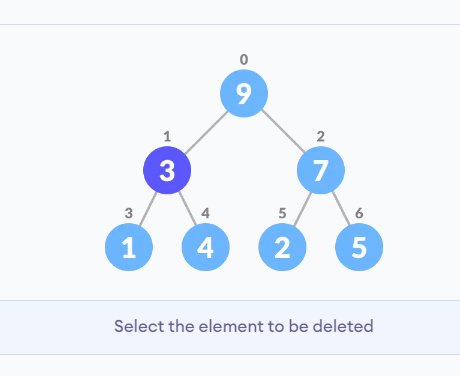

* Swap it with the last element.


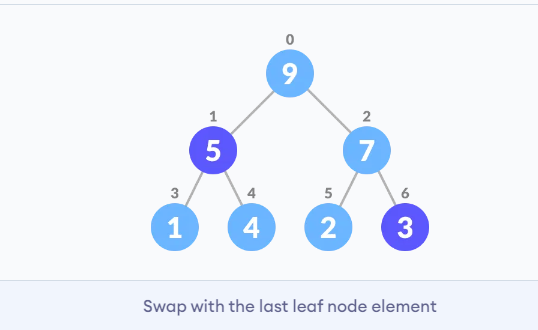

# Remove the last element

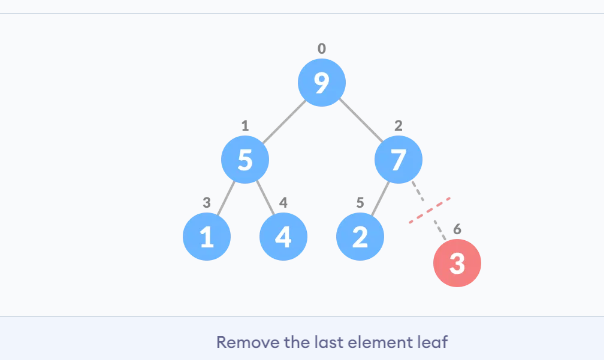

* Heapify the tree.

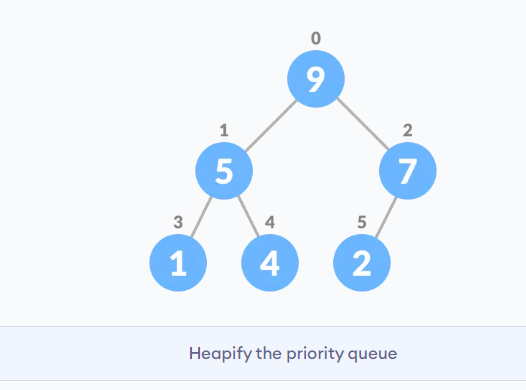

# Algorithm for deletion of an element in the priority queue (max-heap)



In [3]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def parent(self, i):
        return (i - 1) // 2

    def left_child(self, i):
        return 2 * i + 1

    def right_child(self, i):
        return 2 * i + 2

    def heapify_down(self, i):
        largest = i
        left = self.left_child(i)
        right = self.right_child(i)

        if left < len(self.heap) and self.heap[left] > self.heap[largest]:
            largest = left
        if right < len(self.heap) and self.heap[right] > self.heap[largest]:
            largest = right

        if largest != i:
            self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
            self.heapify_down(largest)

    def insert(self, key):
        self.heap.append(key)
        index = len(self.heap) - 1

        # Fix the heap property (max-heap)
        while index != 0 and self.heap[self.parent(index)] < self.heap[index]:
            self.heap[index], self.heap[self.parent(index)] = self.heap[self.parent(index)], self.heap[index]
            index = self.parent(index)

    def delete(self, key):
        try:
            index = self.heap.index(key)
        except ValueError:
            print("Element not found in the heap")
            return

        # If the node to be deleted is the last element, remove it
        if index == len(self.heap) - 1:
            self.heap.pop()
        else:
            # Swap with the last element and remove the node
            self.heap[index], self.heap[-1] = self.heap[-1], self.heap[index]
            self.heap.pop()

            # Heapify to restore max-heap property
            self.heapify_down(index)

# Example usage:
max_heap = MaxHeap()
max_heap.insert(20)
max_heap.insert(15)
max_heap.insert(8)
max_heap.insert(10)
max_heap.insert(5)
max_heap.insert(7)
max_heap.insert(6)

print("Heap before deletion:", max_heap.heap)
max_heap.delete(15)
print("Heap after deletion:", max_heap.heap)


Heap before deletion: [20, 15, 8, 10, 5, 7, 6]
Heap after deletion: [20, 10, 8, 6, 5, 7]


For Min Heap, the above algorithm is modified so that the both childNodes are smaller than currentNode.

# 3. Peeking from the Priority Queue (Find max/min)
Peek operation returns the maximum element from Max Heap or minimum element from Min Heap without deleting the node.

For both Max heap and Min Heap

return rootNode

# 4. Extract-Max/Min from the Priority Queue
Extract-Max returns the node with maximum value after removing it from a Max Heap whereas Extract-Min returns the node with minimum value after removing it from Min Heap.

In [4]:
# Priority Queue implementation in Python


# Function to heapify the tree
def heapify(arr, n, i):
    # Find the largest among root, left child and right child
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    # Swap and continue heapifying if root is not largest
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)


# Function to insert an element into the tree
def insert(array, newNum):
    size = len(array)
    if size == 0:
        array.append(newNum)
    else:
        array.append(newNum)
        for i in range((size // 2) - 1, -1, -1):
            heapify(array, size, i)


# Function to delete an element from the tree
def deleteNode(array, num):
    size = len(array)
    i = 0
    for i in range(0, size):
        if num == array[i]:
            break

    array[i], array[size - 1] = array[size - 1], array[i]

    array.remove(size - 1)

    for i in range((len(array) // 2) - 1, -1, -1):
        heapify(array, len(array), i)


arr = []

insert(arr, 3)
insert(arr, 4)
insert(arr, 9)
insert(arr, 5)
insert(arr, 2)

print ("Max-Heap array: " + str(arr))

deleteNode(arr, 4)
print("After deleting an element: " + str(arr))

Max-Heap array: [9, 5, 4, 3, 2]
After deleting an element: [9, 5, 2, 3]


# Priority Queue Applications
# Some of the applications of a priority queue are:

Dijkstra's algorithm

for implementing stack

for load balancing and interrupt handling in an operating system

for data compression in Huffman code